In [63]:
import pandas as pd
import plotly.graph_objects as go
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import spacy
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("McDonald_s_Reviews.csv", encoding="latin1")

In [3]:
sia = SentimentIntensityAnalyzer()

In [4]:
def get_sentiment_score(review):
    return sia.polarity_scores(review)['compound']

In [5]:
data['sentiment_score'] = data['review'].apply(get_sentiment_score)

In [54]:
print("Veri Seti Bilgisi:")
print(data.info())

Veri Seti Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   reviewer_id        33396 non-null  int64  
 1   store_name         33396 non-null  object 
 2   category           33396 non-null  object 
 3   store_address      33396 non-null  object 
 4   latitude           32736 non-null  float64
 5   longitude          32736 non-null  float64
 6   rating_count       33396 non-null  object 
 7   review_time        33396 non-null  object 
 8   review             33396 non-null  object 
 9   rating             33396 non-null  object 
 10  sentiment_score    33396 non-null  float64
 11  sentiment_class    33396 non-null  object 
 12  sentiment_numeric  33396 non-null  int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 3.3+ MB
None


In [56]:
print("\nVeri Setinin İlk Birkaç Satırı:")
print(data.head())


Veri Setinin İlk Birkaç Satırı:
   reviewer_id  store_name              category  \
0            1  McDonald's  Fast food restaurant   
1            2  McDonald's  Fast food restaurant   
2            3  McDonald's  Fast food restaurant   
3            4  McDonald's  Fast food restaurant   
4            5  McDonald's  Fast food restaurant   

                                       store_address  latitude   longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  rating_count   review_time  \
0        1,240  3 months ago   
1        1,240    5 days ago   
2        1,240    5 days ago   
3        1,240   a month ago   
4        1,240  2 months 

In [58]:
sentiment_distribution = data['sentiment_class'].value_counts()
print("\nDuygu Dağılımı:")
print(sentiment_distribution)


Duygu Dağılımı:
Positive    17438
Negative     9573
Neutral      6385
Name: sentiment_class, dtype: int64


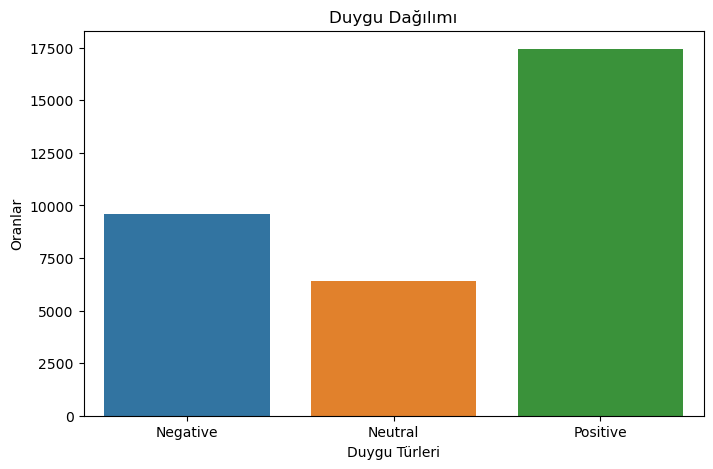

In [61]:
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='sentiment_class', order=['Negative', 'Neutral', 'Positive'])
plt.title("Duygu Dağılımı")
plt.xlabel("Duygu Türleri")
plt.ylabel("Oranlar")
plt.show()

In [72]:
stop_words = set(stopwords.words('english'))
words = [word for review in data['review'] for word in review.lower().split() if word not in stop_words]

In [73]:
word_freq = Counter(words)

In [74]:
common_words = word_freq.most_common(20)
words, freq = zip(*common_words)

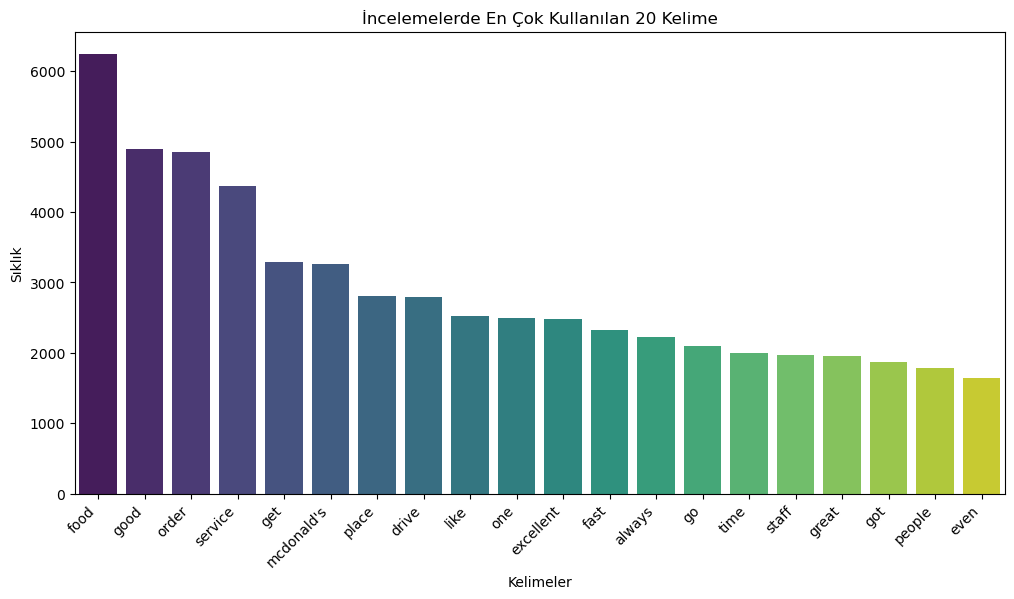

In [76]:
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(freq), palette='viridis')
plt.title("İncelemelerde En Çok Kullanılan 20 Kelime")
plt.xlabel("Kelimeler")
plt.ylabel("Sıklık")
plt.xticks(rotation=45, ha='right')
plt.show()

In [24]:
data['sentiment_numeric'] = data['sentiment_class'].map({'Neutral': 0, 'Positive': 1, 'Negative': -1})

In [6]:
def get_sentiment_class(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

data['sentiment_class'] = data['sentiment_score'].apply(get_sentiment_class)

In [7]:
X = data['review']
y = data['sentiment_class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [77]:
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Sınıflandırma Raporu")
print(classification_report(y_test, y_pred))

Accuracy: 0.8747005988023953
Sınıflandırma Raporu
              precision    recall  f1-score   support

    Negative       0.85      0.84      0.84      1937
     Neutral       0.87      0.80      0.83      1244
    Positive       0.89      0.92      0.90      3499

    accuracy                           0.87      6680
   macro avg       0.87      0.85      0.86      6680
weighted avg       0.87      0.87      0.87      6680



In [12]:
def predict_sentiment(review):
    review_tfidf = vectorizer.transform([review])
    sentiment = model.predict(review_tfidf)
    return sentiment[0]

In [84]:
new_review = "Delicious."
predicted_sentiment = predict_sentiment(new_review)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Positive


In [83]:
new_review2 = "It was perfect."
predicted_sentiment = predict_sentiment(new_review2)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Positive


In [85]:
new_review83 = "Just an ordinary food."
predicted_sentiment = predict_sentiment(new_review83)
print("Predicted sentiment:", predicted_sentiment)

Predicted sentiment: Neutral


In [25]:
def plot_3d_graph(X_tfidf, y):
    svd = TruncatedSVD(n_components=3, random_state=42)
    X_3d = svd.fit_transform(X_tfidf)
    fig = go.Figure(data=[go.Scatter3d(x=X_3d[:, 0], y=X_3d[:, 1], z=X_3d[:, 2], mode='markers', marker=dict(color=data['sentiment_numeric'], colorscale='Viridis', opacity=0.8))])
    fig.show()

In [26]:
plot_3d_graph(X_train_tfidf, y_train)

In [18]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)
y_pred_svm = svm_model.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8721556886227545
SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.78      0.87      0.82      1937
     Neutral       0.87      0.81      0.84      1244
    Positive       0.93      0.90      0.92      3499

    accuracy                           0.87      6680
   macro avg       0.86      0.86      0.86      6680
weighted avg       0.88      0.87      0.87      6680



In [19]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
y_pred_nb = nb_model.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Multinomial Naive Bayes Accuracy:", accuracy_nb)
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Multinomial Naive Bayes Accuracy: 0.7537425149700598
Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.78      0.77      1937
     Neutral       0.99      0.22      0.36      1244
    Positive       0.74      0.93      0.82      3499

    accuracy                           0.75      6680
   macro avg       0.83      0.64      0.65      6680
weighted avg       0.79      0.75      0.72      6680



In [48]:
nlp = spacy.load("en_core_web_sm")
processed_text = []
for doc in nlp.pipe(data['review']):
    words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    processed_text.extend(words)

In [49]:
processed_text = " ".join(processed_text)

In [50]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(processed_text)

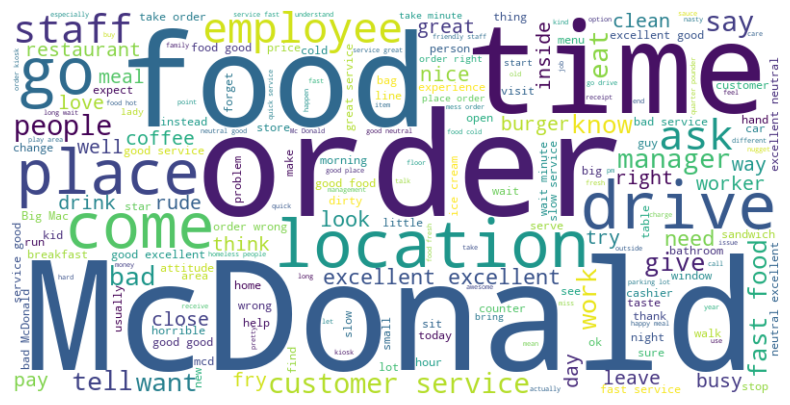

In [51]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()